# Chinook Data Analysis

## 1- Connection To MySQL and Creating Tables

#### Step 1: Importing Necessary Libraries

In [7]:
import pandas as pd

import json
import mysql.connector

import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Read Json File Containing Config

In [8]:
with open('/Users/mahlagha/Desktop/Works in Progress/Data Science/Daneshkar/5- Data Analysis/Mentor/db_config.json', 'r') as config_file:
    db_config = json.load(config_file)

#### Step 3: Connecting to MySQL Using SQLAlchemy library

In [9]:
from sqlalchemy import create_engine

# Extract the connection details from the config
username = db_config['user']
password = db_config['password']
host = db_config['host']
database = db_config['database']

# Create the connection string
connection_string = f'mysql+mysqlconnector://{username}:{password}@{host}/{database}'

# Create an SQLAlchemy engine
engine = create_engine(connection_string)

#### Step 4: Creating Dataframes

In [10]:
Album = pd.read_sql('Album', con=engine)
Artist = pd.read_sql('Artist', con=engine)
Customer = pd.read_sql('Customer', con=engine)
Employee = pd.read_sql('Employee', con=engine)
Genre = pd.read_sql('Genre', con=engine)
Invoice = pd.read_sql('Invoice', con=engine)
InvoiceLine = pd.read_sql('InvoiceLine', con=engine)
MediaType = pd.read_sql('MediaType', con=engine)
Playlist = pd.read_sql('Playlist', con=engine)
PlaylistTrack = pd.read_sql('PlaylistTrack', con=engine)
Track = pd.read_sql('Track', con=engine)

#### Step 5: Save csv files

In [11]:
Album.to_csv('/Users/mahlagha/Chinook/data/processed/Album.csv', index=False)
Artist.to_csv('/Users/mahlagha/Chinook/data/processed/Artist.csv', index=False)
Customer.to_csv('/Users/mahlagha/Chinook/data/processed/Customer.csv', index=False)
Employee.to_csv('/Users/mahlagha/Chinook/data/processed/Employee.csv', index=False)
Genre.to_csv('/Users/mahlagha/Chinook/data/processed/Genre.csv', index=False)
Invoice.to_csv('/Users/mahlagha/Chinook/data/processed/Invoice.csv', index=False)
InvoiceLine.to_csv('/Users/mahlagha/Chinook/data/processed/InvoiceLine.csv', index=False)
MediaType.to_csv('/Users/mahlagha/Chinook/data/processed/MediaType.csv', index=False)
Playlist.to_csv('/Users/mahlagha/Chinook/data/processed/Playlist.csv', index=False)
PlaylistTrack.to_csv('/Users/mahlagha/Chinook/data/processed/PlaylistTrack.csv', index=False)
Track.to_csv('/Users/mahlagha/Chinook/data/processed/Track.csv', index=False)

## 2-Descriptive Analysis

In [12]:
tables_dict = {
    'Album': Album,
    'Artist': Artist,
    'Customer': Customer,
    'Employee': Employee,
    'Genre': Genre,
    'Invoice': Invoice,
    'InvoiceLine': InvoiceLine,
    'MediaType': MediaType,
    'Playlist': Playlist,
    'PlaylistTrack': PlaylistTrack,
    'Track': Track
    }

for k, v in tables_dict.items():
    print(f"{k} Dimension: {v.shape[0]} rows,  {v.shape[1]} columns")

Album Dimension: 347 rows,  3 columns
Artist Dimension: 275 rows,  2 columns
Customer Dimension: 59 rows,  13 columns
Employee Dimension: 8 rows,  15 columns
Genre Dimension: 25 rows,  2 columns
Invoice Dimension: 412 rows,  9 columns
InvoiceLine Dimension: 2240 rows,  5 columns
MediaType Dimension: 5 rows,  2 columns
Playlist Dimension: 18 rows,  2 columns
PlaylistTrack Dimension: 8715 rows,  2 columns
Track Dimension: 3503 rows,  9 columns


## 3-Checking Missing Values

In [13]:
for k, v in tables_dict.items():
    print(v.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AlbumId   347 non-null    int64 
 1   Title     347 non-null    object
 2   ArtistId  347 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ArtistId  275 non-null    int64 
 1   Name      275 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerId    59 non-null     int64 
 1   FirstName     59 non-null     object
 2   LastName      59 non-null     object
 3   Company       10 non-n

No Missing Value Concluded.

## 4-Checking Duplicates

In [38]:
for k, v in tables_dict.items():
    print('In {} dataframe, Known observations: {} - Unique observations: {}'.format(k, len(v.index),len(v.drop_duplicates().index)))

In Album dataframe, Known observations: 347 - Unique observations: 347
In Artist dataframe, Known observations: 275 - Unique observations: 275
In Customer dataframe, Known observations: 59 - Unique observations: 59
In Employee dataframe, Known observations: 8 - Unique observations: 8
In Genre dataframe, Known observations: 25 - Unique observations: 25
In Invoice dataframe, Known observations: 412 - Unique observations: 412
In InvoiceLine dataframe, Known observations: 2240 - Unique observations: 2240
In MediaType dataframe, Known observations: 5 - Unique observations: 5
In Playlist dataframe, Known observations: 18 - Unique observations: 18
In PlaylistTrack dataframe, Known observations: 8715 - Unique observations: 8715
In Track dataframe, Known observations: 3503 - Unique observations: 3503


No duplicates Concluded.

## 5- Distribution of key Variables

### 5-1 Categorical Variables

A) Genre Type

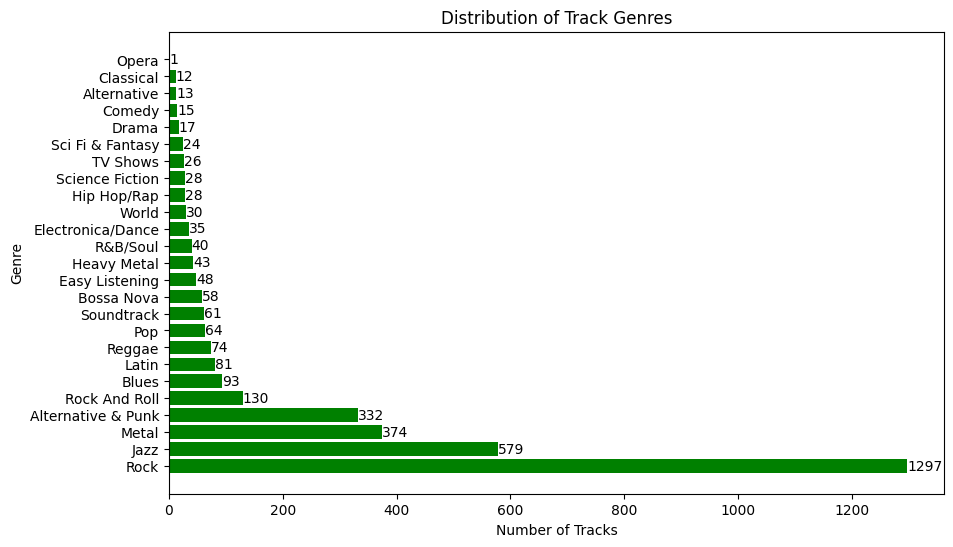

In [15]:
# Horizontal Bar Plot
plt.figure(figsize=(10, 6))
genre_counts_tracks = Track['GenreId'].value_counts()
barhchart = plt.barh(Genre['Name'], genre_counts_tracks, align='center', color='green')

# Add data lables
for bar in barhchart:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center', ha='left')
    
plt.title('Distribution of Track Genres')
plt.ylabel('Genre')
plt.xlabel('Number of Tracks')
plt.show()

B) Media Type

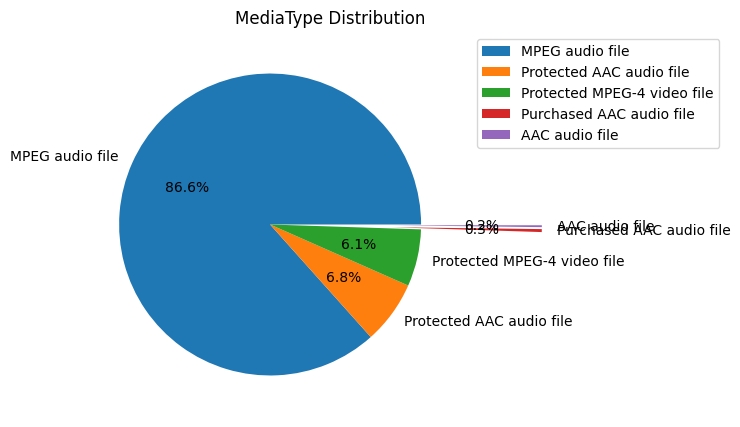

In [102]:
# Pie Plot
plt.figure(figsize=(6,5))
media_counts_tracks = Track['MediaTypeId'].value_counts()
labels = MediaType['Name'].unique()
explode = [0.8 if count < media_counts_tracks.max() * 0.05 else 0 for count in media_counts_tracks]
plt.pie(media_counts_tracks, labels=labels, autopct='%1.1f%%', explode=explode)
plt.title('MediaType Distribution')
plt.axis('equal')
plt.legend(loc='best', bbox_to_anchor=(0.8,1))
plt.show()

C) Customers' Nationality

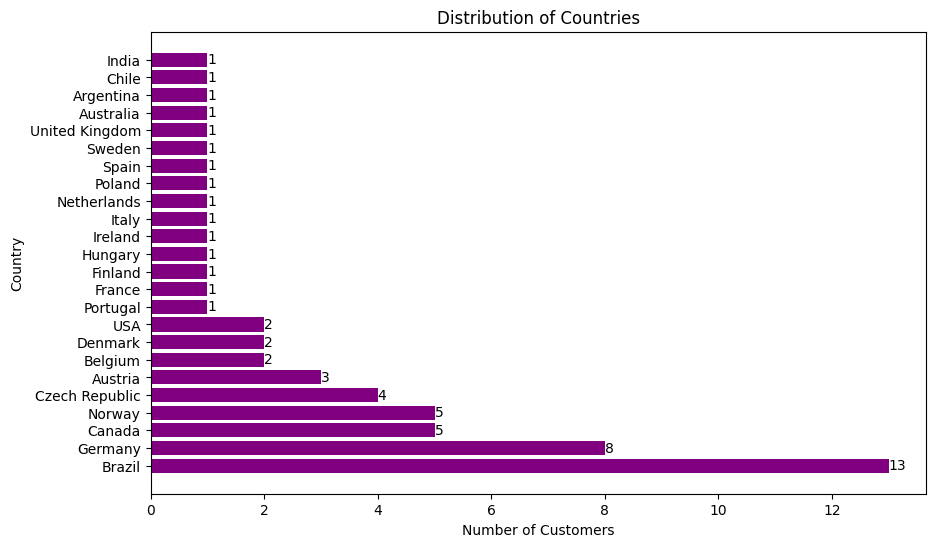

In [130]:
# Horizontal Bar Plot
plt.figure(figsize=(10, 6))
customer_country_count = Customer['Country'].value_counts()
barhchart = plt.barh(Customer['Country'].unique(), customer_country_count, align='center', color='purple')

# Add data lables
for bar in barhchart:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center', ha='left')
    
plt.title('Distribution of Countries')
plt.ylabel('Country')
plt.xlabel('Number of Customers')
plt.show()

D) Employees' Job Title

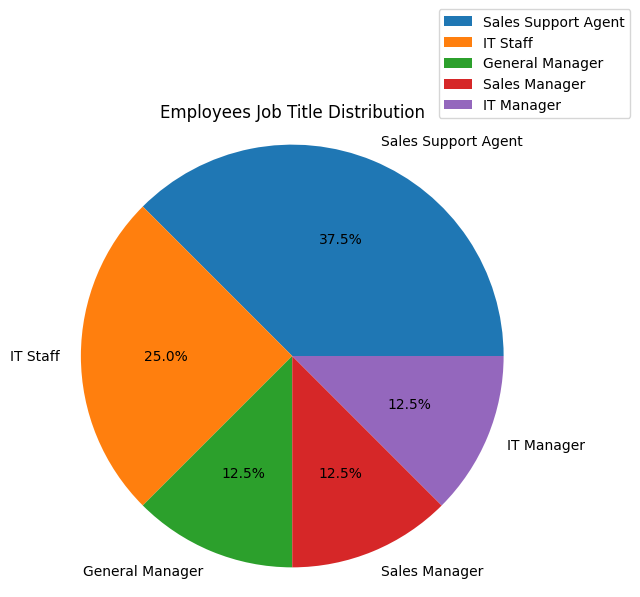

In [123]:
# Pie Plot
plt.figure(figsize=(6,6))
labels = Employee['Title'].value_counts().index
plt.pie (Employee['Title'].value_counts(), labels=labels, autopct='%1.1f%%')
plt.title('Employees Job Title Distribution')
plt.axis('equal')
plt.legend(loc='best', bbox_to_anchor=(0.8,1))
plt.show()

### 5-2 Check Normality of Numerical Variables 

#### 5-2-1 Track Duration 


A) Histogram and Q-Q Plot

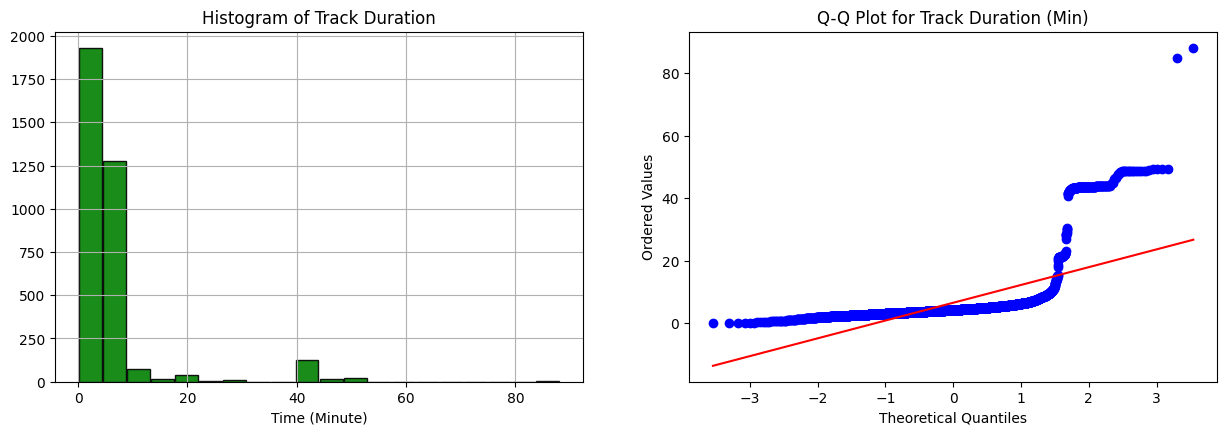

In [86]:
plt.figure(figsize=(15 , 10))

# Histogram
track_time = Track['Milliseconds']/60000
plt.subplot(2,2,1)
plt.hist(track_time, bins=20, alpha=0.9, rwidth=0.95, color='g',edgecolor='k')
plt.title('Histogram of Track Duration')
plt.xlabel('Time (Minute)')
plt.grid()

# Q-Q Plot
plt.subplot(2,2,2)
stats.probplot(Track['Milliseconds']/60000, dist="norm", plot=plt)
plt.title('Q-Q Plot for Track Duration (Min)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

plt.show()

B) Shapiro-Wilk Test

In [22]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
statistic, p_value = shapiro(Track['Milliseconds']/60000)
print(f"Shapiro-Wilk Test for Track Duration: Statistic = {statistic}, p-value = {p_value}")

print(f"T-statistic: {statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print( "Track Duration data is not normally distributed." )
else:
    print( "Therefore, Track Duration is normally distributed.")

Shapiro-Wilk Test for Track Duration: Statistic = 0.4069350980582944, p-value = 2.7287436202316018e-75
T-statistic: 0.4069350980582944, p-value: 2.7287436202316018e-75
Track Duration data is not normally distributed.


**** Considering the Histogram, Q-Q plot and the result of Shapiro-wilk test, Track Duration is not normally distributed ***

C) Box Plot - Cheking for Outliers

Min= 0.0178 min, Max= 88.1159 min, Q1= 3.4547 min, median= 4.2606 min, Q3= 5.3607 min
IQR= 1.9061, lower_bound= 0.5956, upper_bound= 8.2198


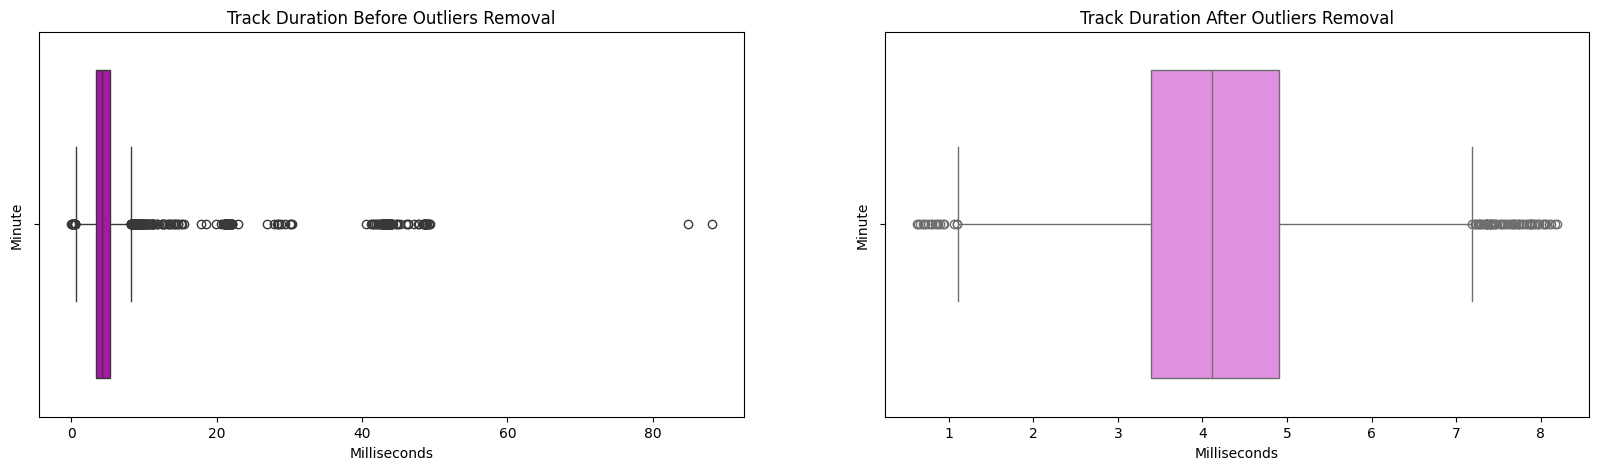

In [72]:
# Box plot Calculations
MIN = np.min(Track['Milliseconds']/60000)
Q1 = np.quantile (Track['Milliseconds']/60000, 0.25)
Q2 = np.quantile (Track['Milliseconds']/60000, 0.5)
Q3 = np.quantile (Track['Milliseconds']/60000, 0.75)
MAX = np.max(Track['Milliseconds']/60000)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Min= {MIN.round(4)} min, Max= {MAX.round(4)} min, Q1= {Q1.round(4)} min, median= {Q2.round(4)} min, Q3= {Q3.round(4)} min')
print(f'IQR= {IQR.round(4)}, lower_bound= {lower_bound.round(4)}, upper_bound= {upper_bound.round(4)}')

# Remove outliers
Track_time_cleaned = Track[(Track['Milliseconds']/60000 >= lower_bound) & (Track['Milliseconds']/60000 <= upper_bound)]


# Box Plots
track_time = Track['Milliseconds']/60000
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.boxplot(x=track_time, color='m')
plt.title('Track Duration Before Outliers Removal')
plt.ylabel('Minute')

track_time_clean = Track_time_cleaned['Milliseconds']/60000
plt.subplot(1, 2, 2)
sns.boxplot(x=track_time_clean, color='violet')
plt.title('Track Duration After Outliers Removal')
plt.ylabel('Minute')
plt.show()


#### 5-2-2 Track Size 


A) Histogram and Q-Q Plot

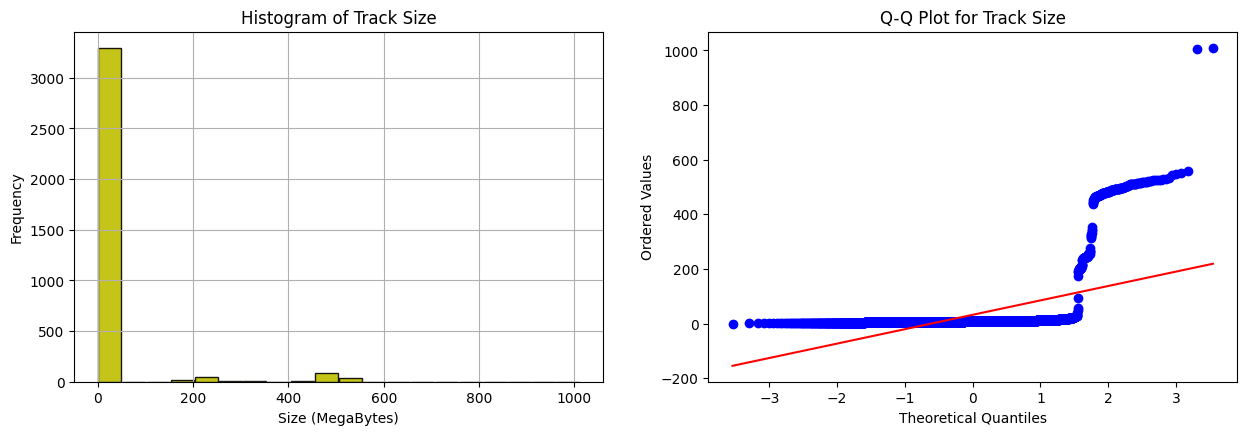

In [87]:
plt.figure(figsize=(15, 10))

# Histogram
track_size = Track['Bytes']/1048576
plt.subplot(2,2,1)
plt.hist(track_size, bins=20, alpha=0.9, rwidth=0.95, color='y', edgecolor='k')
plt.title('Histogram of Track Size')
plt.xlabel('Size (MegaBytes)')
plt.ylabel('Frequency')
plt.grid()

# Q-Q Plot
plt.subplot(2,2,2)
stats.probplot(Track['Bytes']/1048576, dist="norm", plot=plt)
plt.title('Q-Q Plot for Track Size')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

plt.show()

B) Shapiro-Wilk Test

In [26]:
# Shapiro-Wilk Test
statistic, p_value = shapiro(Track['Bytes']/1048576)
print(f"Shapiro-Wilk Test for Track Size: Statistic = {statistic}, p-value = {p_value}")

print(f"T-statistic: {statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print( "Track Size data is not normally distributed." )
else:
    print( "Therefore, Track Size is normally distributed.")

Shapiro-Wilk Test for Track Size: Statistic = 0.2756405817618163, p-value = 1.727556506066784e-79
T-statistic: 0.2756405817618163, p-value: 1.727556506066784e-79
Track Size data is not normally distributed.


**** Considering the Histogram, Q-Q plot and the result of Shapiro-wilk test, Track Size is not normally distributed ***

D) Box Plot - Handling Outliers

Min= 0.037 min, Max= 1010.4619 min, Q1= 6.0487 min, median= 7.7323 min, Q3= 9.7912 min
IQR= 3.7424, lower_bound= 0.4351, upper_bound= 15.4048


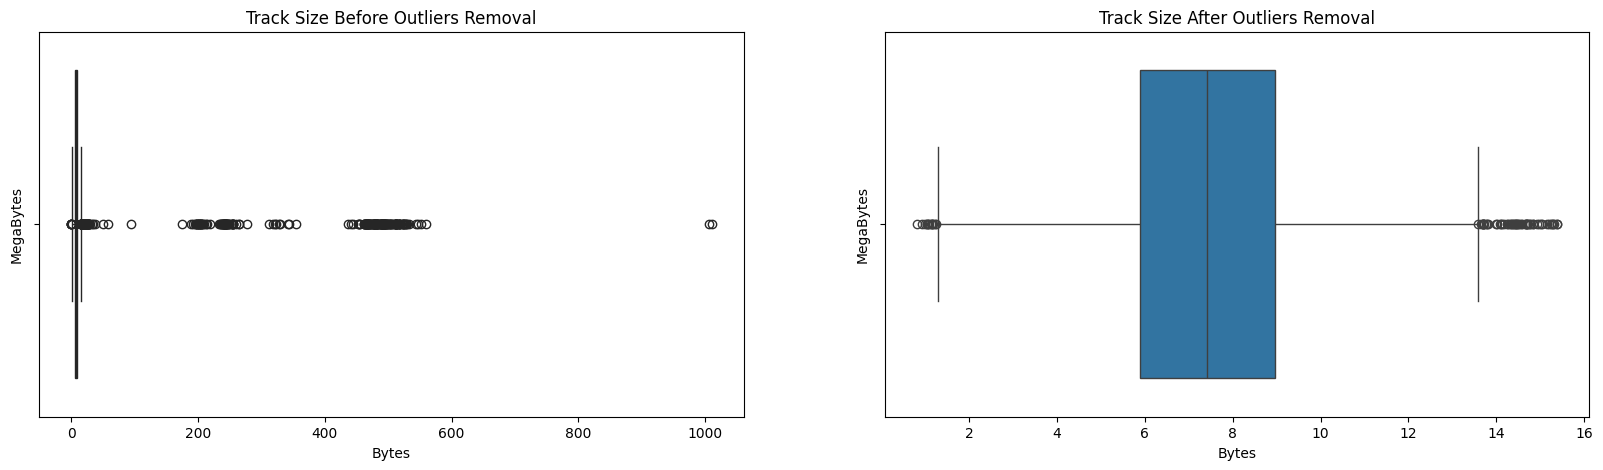

In [81]:
# Box plot Calculations
MIN = np.min(Track ['Bytes']/1048576)
Q1 = np.quantile (Track ['Bytes']/1048576, 0.25)
Q2 = np.quantile (Track ['Bytes']/1048576, 0.5)
Q3 = np.quantile (Track ['Bytes']/1048576, 0.75)
MAX = np.max(Track ['Bytes']/1048576)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Min= {MIN.round(4)} min, Max= {MAX.round(4)} min, Q1= {Q1.round(4)} min, median= {Q2.round(4)} min, Q3= {Q3.round(4)} min')
print(f'IQR= {IQR.round(4)}, lower_bound= {lower_bound.round(4)}, upper_bound= {upper_bound.round(4)}')

# Remove outliers
Track_Size_cleaned = Track[(Track ['Bytes']/1048576 >= lower_bound) & (Track ['Bytes']/1048576 <= upper_bound)]


# Box Plots
track_size = Track ['Bytes']/1048576
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=track_size, color='green')
plt.title('Track Size Before Outliers Removal')
plt.ylabel('MegaBytes')

track_size_clean = Track_Size_cleaned['Bytes']/1048576
plt.subplot(1, 2, 2)
sns.boxplot(x=track_size_clean)
plt.title('Track Size After Outliers Removal')
plt.ylabel('MegaBytes')
plt.show()

#### 5-2-3 Unit Price

In [45]:
Track['UnitPrice'].unique()

array([0.99, 1.99])

According to the Above Unique function executed on Track Dataframe, UnitPrice is not a continuous numerical variable because there is only two different price available {0.99, 1.99}. Therefore, it cannot be normally distributed.

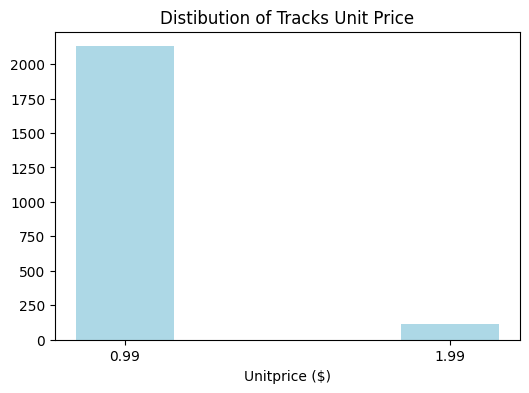

In [85]:
# Bar plot
plt.figure(figsize= (6,4))
plt.bar(InvoiceLine['UnitPrice'].unique(), InvoiceLine['UnitPrice'].value_counts(), color = 'lightblue', width = 0.3, tick_label = ['0.99', '1.99'])
plt.title('Distibution of Tracks Unit Price')
plt.xlabel('Unitprice ($)')
plt.show()

#### 5-2-4 Quantity Sold

In [82]:
InvoiceLine['Quantity'].unique()

array([1])

According to the Above Unique function executed on InvoiceLine Dataframe, Quantity is not a continuous numerical variable because The number of each track sold is only 1. Therefore, it cannot be normally distributed.

#### 5-2-5 Total Sale

A) Histogram and Q-Q Plot

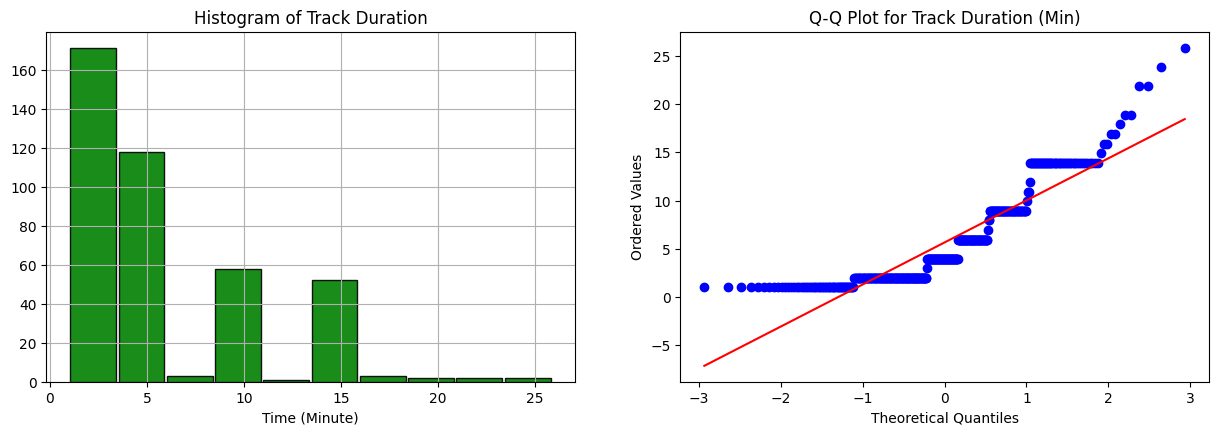

In [96]:
plt.figure(figsize=(15 , 10))

# Histogram
plt.subplot(2,2,1)
plt.hist(Invoice.Total, alpha=0.9, rwidth=0.95, color='g',edgecolor='k')
plt.title('Histogram of Track Duration')
plt.xlabel('Time (Minute)')
plt.grid()

# Q-Q Plot
plt.subplot(2,2,2)
stats.probplot(Invoice.Total, dist="norm", plot=plt)
plt.title('Q-Q Plot for Track Duration (Min)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

plt.show()

B) Shapiro-Wilk Test

In [98]:
# Shapiro-Wilk Test
statistic, p_value = shapiro(Invoice['Total'])
print(f"Shapiro-Wilk Test for Track Total Sold: Statistic = {statistic}, p-value = {p_value}")

print(f"T-statistic: {statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print( "Total Tracks Sale is not normally distributed." )
else:
    print( "Therefore, Total Track Sale is normally distributed.")

Shapiro-Wilk Test for Track Total Sold: Statistic = 0.8367111017894933, p-value = 3.40018438974463e-20
T-statistic: 0.8367111017894933, p-value: 3.40018438974463e-20
Total Tracks Sale is not normally distributed.


C) D’Agostino’s K^2 Test

In [131]:
stat, p = stats.normaltest(Invoice['Total'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Total Tracks Sale looks Gaussian (fail to reject H0)')
else:
    print('Total Tracks Sale does not look Gaussian (reject H0)')

Statistics=77.62089, p=0.000
Total Tracks Sale does not look Gaussian (reject H0)


According to Shapiro-wilk test and D'Agostino's k^2 Test, Total sale is not normally distributted.